<a href="https://colab.research.google.com/github/Usman-Meh/Breath-First-Search/blob/main/Classification_on_mental_disorder_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# **Loading Datset**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Ma'am Tayyba/Dataset-Mental-Disorders.csv")

In [ ]:
df.head() #showing first five rows

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


# **Cleaning DataSet**

In [ ]:
df.isnull().sum() #checking the null values or empty indexes

Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64

In [ ]:
df.info() #taking information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [ ]:
df.describe() #Mostly column are string so counting values,frequency and top

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
count,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
unique,120,4,4,4,4,2,3,2,2,2,2,2,2,2,2,9,8,9,4
top,Patiant-01,Usually,Seldom,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,5 From 10,4 From 10,6 From 10,Bipolar Type-2
freq,1,42,46,38,44,63,63,74,73,63,62,70,62,61,65,22,33,21,31


In [ ]:
df.drop(["Patient Number"],axis=1,inplace=True) #removing ID of patient because it is uselss
df.columns

Index(['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing',
       'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation',
       'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down',
       'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration',
       'Optimisim', 'Expert Diagnose'],
      dtype='object')

# **Preprocessing Data**

In [ ]:
import sklearn.preprocessing as pp
ordinal_encoding=pp.OrdinalEncoder() #encoding Data to convert string into numerical or understandable to machine algorithmns
x=df.iloc[:,:-1] #seprating import features
y=df.iloc[:,-1] #Seprating important Labels

In [ ]:
from sklearn.compose import make_column_transformer
transform_x=make_column_transformer((ordinal_encoding,['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing',
       'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation',
       'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down',
       'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration',
       'Optimisim']))

In [ ]:
process_x=transform_x.fit_transform(x) #Trasforming Features Data into numerical

In [ ]:
process_y=ordinal_encoding.fit_transform(np.c_[y])
process_y   #ecoding Labels into numerical

array([[1.],
       [2.],
       [0.],
       [1.],
       [3.],
       [2.],
       [0.],
       [3.],
       [1.],
       [2.],
       [3.],
       [0.],
       [1.],
       [3.],
       [2.],
       [0.],
       [3.],
       [0.],
       [2.],
       [3.],
       [1.],
       [0.],
       [3.],
       [2.],
       [1.],
       [3.],
       [3.],
       [2.],
       [1.],
       [3.],
       [0.],
       [2.],
       [1.],
       [0.],
       [3.],
       [2.],
       [0.],
       [1.],
       [3.],
       [1.],
       [2.],
       [1.],
       [3.],
       [0.],
       [2.],
       [1.],
       [3.],
       [1.],
       [0.],
       [2.],
       [3.],
       [1.],
       [2.],
       [0.],
       [1.],
       [3.],
       [0.],
       [0.],
       [2.],
       [3.],
       [1.],
       [2.],
       [0.],
       [1.],
       [3.],
       [2.],
       [3.],
       [0.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [3.],
       [1.],
       [2.],
       [2.],

# ***Spliting DataSet***

Seprating train data and test data

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split( process_x , process_y)


# ***Training on KNN algorithm***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)


In [ ]:
knn_model.fit(train_x, train_y)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
predict_y = knn_model.predict(test_x)

In [ ]:
predict_y

array([1., 2., 0., 0., 3., 0., 1., 1., 0., 3., 0., 2., 0., 2., 3., 2., 2.,
       3., 3., 2., 1., 1., 2., 0., 2., 0., 3., 0., 2., 3.])

# **KNN Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
KNN_accuracy = accuracy_score(test_y, predict_y)


In [ ]:
KNN_accuracy

0.6666666666666666

# **Training on SVM algorithm**

In [ ]:
from sklearn.svm import SVC
# Create an SVM classifier
svm_classifier = SVC(kernel='linear')


In [ ]:
svm_classifier.fit(train_x,train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [ ]:
svm_predict_y = svm_classifier.predict(test_x)

# **SVM Accuracy**

In [ ]:
svm_accuracy =accuracy_score(test_y, svm_predict_y)

In [ ]:
svm_accuracy

0.6666666666666666

# **Traning on Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Create a Gaussian Naive Bayes classifier
gnb_classifier = MultinomialNB()

In [ ]:
gnb_classifier.fit(train_x,train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [ ]:
gnb_prdict_y =gnb_classifier.predict(test_x)

# **Navie Bayes Accuracy**

In [ ]:
gnb_accuracy =accuracy_score(test_y,gnb_prdict_y)

In [ ]:
gnb_accuracy

0.8333333333333334

# **Traing on Decision Tree algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

In [ ]:
dt_classifier.fit(train_x,train_y)

DecisionTreeClassifier()

In [ ]:
dt_predict_y =dt_classifier.predict(test_x)

# **Decision Tree Accuracy**

In [ ]:
dt_accuracy =accuracy_score(test_y,dt_predict_y)

In [ ]:
dt_accuracy

0.8666666666666667

# **Visulizing  all Models Accuracy**

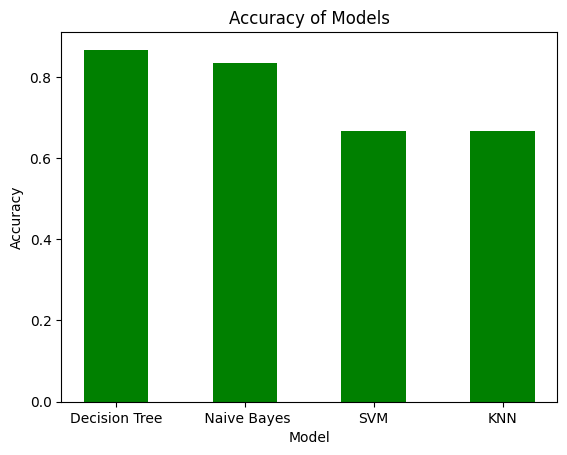

In [ ]:
import matplotlib.pyplot as plt

# Accuracies
accuracies = [dt_accuracy, gnb_accuracy, svm_accuracy, KNN_accuracy]

# Model names
model_names = ['Decision Tree', ' Naive Bayes', 'SVM', 'KNN']

# Create a bar plot
plt.bar(model_names, accuracies, color='green',width=0.5)

# Add title and labels
plt.title('Accuracy of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Show plot
plt.show()
